---

## 필수 라이브러리 설치 및 한글 폰트 설정

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display as dp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [118]:
def change_matplotlib_font(font_url):
    FONT_DIR = "MY_FONT"
    FONT_PATH = os.path.join(FONT_DIR, "NanumGothic.ttf")

    # 1. 폰트 다운로드
    os.makedirs(FONT_DIR, exist_ok=True)
    urllib.request.urlretrieve(font_url, FONT_PATH)

    # 2. matplotlib fontManager에 추가
    fm.fontManager.addfont(FONT_PATH)

    # 3. font 이름 추출
    font_name = fm.FontProperties(fname=FONT_PATH).get_name()

    # 4. 전역 설정 반영
    matplotlib.rc('font', family=font_name)
    plt.rcParams['axes.unicode_minus'] = False

# ---- 실행 ----
change_matplotlib_font("https://raw.githubusercontent.com/fonts-archive/NanumGothic/main/NanumGothic.ttf")

---

## 1 데이터 준비

#### 1-1. 데이터 불러오기

In [119]:
# CSV 파일 URL
url = "https://raw.githubusercontent.com/JyoARa/Machine-Learning/refs/heads/main/Project/Titanic/train.csv"

# 불러오기
df = pd.read_csv(url)

# 처음 5행 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
# 원본 복사
df_kor = df.copy()

In [121]:
# 컬럼명 한글화

# 컬럼명 매핑 (영어 → 한글)
columns_map = {
    "PassengerId": "승객ID",
    "Survived": "생존여부",
    "Pclass": "객실등급",
    "Name": "이름",
    "Sex": "성별",
    "Age": "나이",
    "SibSp": "형제/배우자수",
    "Parch": "부모/자녀수",
    "Ticket": "티켓번호",
    "Fare": "요금",
    "Cabin": "객실번호",
    "Embarked": "승선항구"
}

# rename으로 변경
df_kor.rename(columns=columns_map, inplace=True)

# 확인
df_kor.head()

,승객ID,생존여부,객실등급,이름,성별,나이,형제/배우자수,부모/자녀수,티켓번호,요금,객실번호,승선항구
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

#### 1-2. 데이터 분석

[🏷️ Titanic Data를 활용한 데이터분석 Project](https://jyoara.tistory.com/16) 를 참고해주세요

---

## 2. 데이터 분할 및 전처리

#### 2-1 데이터 분할

원본 데이터 크기: (891, 11)
학습 데이터 크기: (712, 11) (712,)
테스트 데이터 크기: (179, 11) (179,)


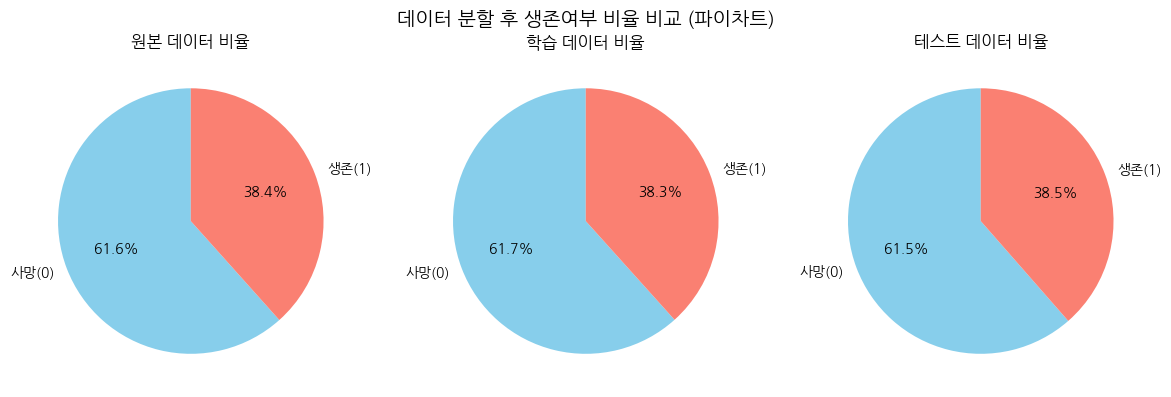

In [122]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

# -----------------------------
# (1) 독립변수(X), 종속변수(y) 분리
# -----------------------------
X = df_kor.drop("생존여부", axis=1)
y = df_kor["생존여부"]

# -----------------------------
# (2) 학습용 / 테스트용 데이터 분할
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# -----------------------------
# (3) 크기 출력
# -----------------------------
print("원본 데이터 크기:", X.shape)
print("학습 데이터 크기:", X_train.shape, y_train.shape)
print("테스트 데이터 크기:", X_test.shape, y_test.shape)

# -----------------------------
# (4) 비율 계산
# -----------------------------
ratio_total = y.value_counts(normalize=True).sort_index()
ratio_train = y_train.value_counts(normalize=True).sort_index()
ratio_test  = y_test.value_counts(normalize=True).sort_index()

# -----------------------------
# (5) 파이차트 시각화
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
colors = ["skyblue", "salmon"]
labels = ["사망(0)", "생존(1)"]

# 원본 데이터
axes[0].pie(ratio_total.values, labels=labels, autopct="%.1f%%", colors=colors, startangle=90)
axes[0].set_title("원본 데이터 비율")

# 학습 데이터
axes[1].pie(ratio_train.values, labels=labels, autopct="%.1f%%", colors=colors, startangle=90)
axes[1].set_title("학습 데이터 비율")

# 테스트 데이터
axes[2].pie(ratio_test.values, labels=labels, autopct="%.1f%%", colors=colors, startangle=90)
axes[2].set_title("테스트 데이터 비율")

plt.suptitle("데이터 분할 후 생존여부 비율 비교 (파이차트)", fontsize=14)
plt.tight_layout()
plt.show()


---

#### 2-2. 머신러닝을 위한 데이터 전처리

In [123]:
X_train_prep = X_train.copy()
X_test_prep  = X_test.copy()

#### 🦖 결측치 처리

In [124]:
# ================================
# 2-1. 결측치 확인
# ================================

print("[결측치 확인]")

# 각 컬럼별 결측치 개수 계산
missing_count = X_train_prep.isnull().sum()

# 전체 대비 결측치 비율 계산
missing_ratio = (missing_count / len(X_train_prep)) * 100

# 결측치 현황을 DataFrame으로 정리
missing_df = pd.DataFrame({
    "결측치 개수": missing_count,
    "결측치 비율(%)": missing_ratio.round(2)
})

# 결측치 많은 순으로 정렬
missing_df = missing_df.sort_values(by="결측치 개수", ascending=False)

# 결측치가 하나라도 있는 컬럼만 출력
missing_df = missing_df[missing_df["결측치 개수"] > 0]

# 표로 출력
dp(missing_df)

[결측치 확인]


,결측치 개수,결측치 비율(%)
객실번호,552,77.53
나이,137,19.24
승선항구,2,0.28


In [ ]:
# from sklearn.impute import SimpleImputer

# -----------------------------
# (1) 수치형 변수 : 나이 결측치 중앙값 대체
# -----------------------------
imputer_age = SimpleImputer(strategy="median")

X_train_prep["나이"] = imputer_age.fit_transform(X_train_prep[["나이"]])[:, 0]
X_test_prep["나이"]  = imputer_age.transform(X_test_prep[["나이"]])[:, 0]

# -----------------------------
# (2) 범주형 변수 : 승선항구 결측치 최빈값 대체
# -----------------------------
imputer_embarked = SimpleImputer(strategy="most_frequent")

X_train_prep["승선항구"] = imputer_embarked.fit_transform(X_train_prep[["승선항구"]])[:, 0]
X_test_prep["승선항구"]  = imputer_embarked.transform(X_test_prep[["승선항구"]])[:, 0]

# -----------------------------
# (3) 범주형 변수 : 객실번호 결측치 "Missing"으로 대체
# -----------------------------
imputer_cabin = SimpleImputer(strategy="constant", fill_value="Missing")

X_train_prep["객실번호"] = imputer_cabin.fit_transform(X_train_prep[["객실번호"]])[:, 0]
X_test_prep["객실번호"]  = imputer_cabin.transform(X_test_prep[["객실번호"]])[:, 0]


In [ ]:
# import pandas as pd

# -----------------------------
# (1) 결측치 처리 전후 개수 비교
# -----------------------------
print(f"[결측치 처리 전후 개수 비교]")
missing_counts_before = X_train[["나이", "승선항구", "객실번호"]].isnull().sum()
missing_counts_after  = X_train_prep[["나이", "승선항구", "객실번호"]].isnull().sum()

missing_summary = pd.DataFrame({
    "처리 전": missing_counts_before,
    "처리 후": missing_counts_after
})

display(missing_summary)

# -----------------------------
# (2) 각 변수별 결측치 있던 행 하나씩 추출 
# -----------------------------
for col in ["나이", "승선항구", "객실번호"]:
    # 해당 변수에서 결측치 있던 인덱스 하나 찾기
    idx = X_train[X_train[col].isnull()].index[0]
    before = X_train.loc[idx, col]
    after  = X_train_prep.loc[idx, col]
    
    print(f"\n[{col} 결측치 처리 예시]")
    print("전처리 전:", before)
    print("전처리 후:", after)


[결측치 처리 전후 개수 비교]


,처리 전,처리 후
나이,137,0
승선항구,2,0
객실번호,552,0



[나이 결측치 처리 예시]
전처리 전: nan
전처리 후: 28.5

[승선항구 결측치 처리 예시]
전처리 전: nan
전처리 후: S

[객실번호 결측치 처리 예시]
전처리 전: nan
전처리 후: Missing


---

#### 🦕 파생변수 생성

In [ ]:
# import pandas as pd

print("[파생변수 생성]")

# -----------------------------
# (1) 나이 구간화
# -----------------------------
구간_나이 = [0, 12, 18, 30, 50, 80]
라벨_나이 = ["어린이", "청소년", "청년", "성인", "노인"]

for df in [X_train_prep, X_test_prep]:
    df["나이구간"] = pd.cut(
        df["나이"],
        bins=구간_나이,
        labels=라벨_나이,
        include_lowest=True
    )

# -----------------------------
# (2) 가족인원 및 혼자여부
# -----------------------------
for df in [X_train_prep, X_test_prep]:
    df["가족인원"] = df["형제/배우자수"] + df["부모/자녀수"] + 1
    df["혼자여부"] = (df["가족인원"] == 1).astype(int).map({1: "O", 0: "X"})

# -----------------------------
# (3) 이름에서 칭호 추출
# -----------------------------
X_train_prep["칭호"] = df_kor.loc[X_train_prep.index, "이름"].str.extract(r",\s*([^\.]+)\.")[0].str.strip()
칭호_빈도 = X_train_prep["칭호"].value_counts()
희귀칭호 = 칭호_빈도[칭호_빈도 < 10].index
X_train_prep["칭호"] = X_train_prep["칭호"].replace(희귀칭호, "Others")

X_test_prep["칭호"] = df_kor.loc[X_test_prep.index, "이름"].str.extract(r",\s*([^\.]+)\.")[0].str.strip()
X_test_prep["칭호"] = X_test_prep["칭호"].replace(희귀칭호, "Others")  # train 규칙 적용

# -----------------------------
# (4) 객실번호 첫 글자 추출
# -----------------------------
for df in [X_train_prep, X_test_prep]:
    df["객실첫글자"] = df["객실번호"].astype(str).str[0]

# -----------------------------
# (5) 요금 구간화 (훈련 데이터 기준)
# -----------------------------
구간_요금 = [0, 10, 50, 100, X_train_prep["요금"].max()]
라벨_요금 = ["L", "M", "H", "VH"]

for df in [X_train_prep, X_test_prep]:
    df["요금구간"] = pd.cut(
        df["요금"],
        bins=구간_요금,
        labels=라벨_요금,
        include_lowest=True
    )

# -----------------------------
# (6) 동일티켓인원
# -----------------------------
for df in [X_train_prep, X_test_prep]:
    df["동일티켓인원"] = df.groupby("티켓번호")["승객ID"].transform("count")

# -----------------------------
# (7) 결과 확인
# -----------------------------
dp(X_train_prep.head())

[파생변수 생성]


,승객ID,객실등급,이름,성별,나이,형제/배우자수,부모/자녀수,티켓번호,요금,객실번호,승선항구,나이구간,가족인원,혼자여부,칭호,객실첫글자,요금구간,동일티켓인원
692,693,3,"Lam, Mr. Ali",male,28.5,0,0,1601,56.4958,Missing,S,청년,1,O,Mr,M,H,6
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.5,0,0,239854,0.0000,Missing,S,청년,1,O,Mr,M,L,1
527,528,1,"Farthing, Mr. John",male,28.5,0,0,PC 17483,221.7792,C95,S,청년,1,O,Mr,C,VH,1
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,Missing,S,청소년,2,X,Mrs,M,L,1
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,Missing,S,성인,3,X,Mrs,M,M,2


In [128]:
# 제거할 컬럼들
drop_cols = ["승객ID", "이름", "객실번호", "티켓번호"]

X_train_prep = X_train_prep.drop(columns=drop_cols)
X_test_prep  = X_test_prep.drop(columns=drop_cols)

dp(X_train_prep.head())

,객실등급,성별,나이,형제/배우자수,부모/자녀수,요금,승선항구,나이구간,가족인원,혼자여부,칭호,객실첫글자,요금구간,동일티켓인원
692,3,male,28.5,0,0,56.4958,S,청년,1,O,Mr,M,H,6
481,2,male,28.5,0,0,0.0000,S,청년,1,O,Mr,M,L,1
527,1,male,28.5,0,0,221.7792,S,청년,1,O,Mr,C,VH,1
855,3,female,18.0,0,1,9.3500,S,청소년,2,X,Mrs,M,L,1
801,2,female,31.0,1,1,26.2500,S,성인,3,X,Mrs,M,M,2


---

#### 🔡 범주형 변수 인코딩

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

print("[범주형 인코딩 + 학습용 최종 데이터셋 생성]")

# -----------------------------
# (1) 변수 구분
# -----------------------------
cat_features = ["객실등급", "성별", "승선항구", 
                "나이구간", "혼자여부", "칭호", 
                "객실첫글자", "요금구간"]

num_features = ["나이", "형제/배우자수", "부모/자녀수", 
                "요금", "가족인원", "동일티켓인원"]

# -----------------------------
# (2) ColumnTransformer 정의
# -----------------------------
ct = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features)
    ]
)

# -----------------------------
# (3) 데이터 변환
# -----------------------------
X_train_enc = ct.fit_transform(X_train_prep)
X_test_enc = ct.transform(X_test_prep)

# -----------------------------
# (4) DataFrame으로 복원
# -----------------------------
encoded_cols = ct.get_feature_names_out()

X_train_final = pd.DataFrame(X_train_enc, columns=encoded_cols, index=X_train_prep.index)
X_test_final = pd.DataFrame(X_test_enc, columns=encoded_cols, index=X_test_prep.index)

# -----------------------------
# (5) 타깃 변수 붙이기
# -----------------------------
train_final = X_train_final.copy()
train_final["Target"] = y_train  # y_train 은 기존에 정의된 타깃 변수

# -----------------------------
# (6) 결과 확인
# -----------------------------
dp(train_final.head())
print("최종 train_final shape:", train_final.shape)
print("최종 X_test_final shape:", X_test_final.shape)

[범주형 인코딩 + 학습용 최종 데이터셋 생성]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,cat__객실등급_2,cat__객실등급_3,cat__성별_male,cat__승선항구_Q,cat__승선항구_S,cat__나이구간_성인,cat__나이구간_어린이,cat__나이구간_청년,cat__나이구간_청소년,cat__혼자여부_X,...,cat__요금구간_L,cat__요금구간_M,cat__요금구간_VH,num__나이,num__형제/배우자수,num__부모/자녀수,num__요금,num__가족인원,num__동일티켓인원,Target
692,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,28.5,0.0,0.0,56.4958,1.0,6.0,1
481,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,28.5,0.0,0.0,0.0000,1.0,1.0,0
527,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,28.5,0.0,0.0,221.7792,1.0,1.0,0
855,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,18.0,0.0,1.0,9.3500,2.0,1.0,1
801,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,31.0,1.0,1.0,26.2500,3.0,2.0,1


최종 train_final shape: (712, 32)
최종 X_test_final shape: (179, 31)


---

## 예측

[모델 학습 + 평가]

[분류 리포트]


,precision,recall,f1-score,support
0,0.862661,0.915718,0.888398,439.000000
1,0.849593,0.765568,0.805395,273.000000
accuracy,0.858146,0.858146,0.858146,0.858146
macro avg,0.856127,0.840643,0.846896,712.000000
weighted avg,0.857651,0.858146,0.856572,712.000000


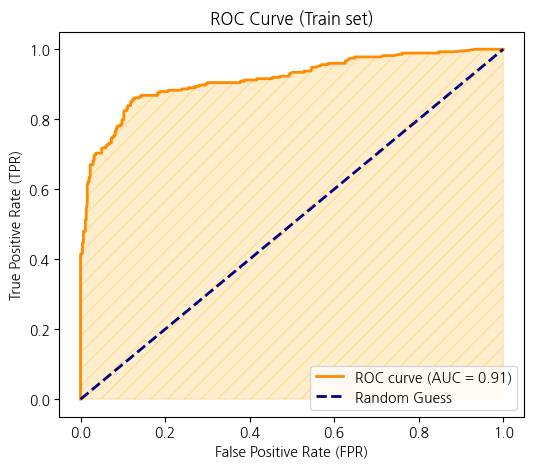

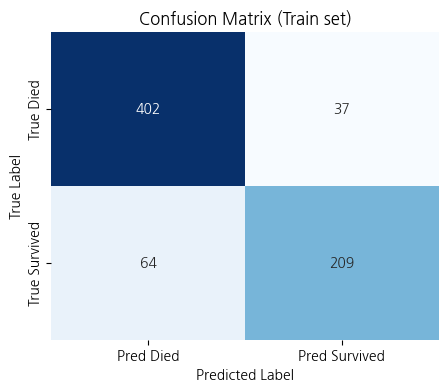

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay
)

print("[모델 학습 + 평가]")

# -----------------------------
# (1) X, y 분리
# -----------------------------
X_train = train_final.drop(columns=["Target"])
y_train = train_final["Target"]

# -----------------------------
# (2) 모델 정의 & 학습
# -----------------------------
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

# -----------------------------
# (3) 훈련 데이터 예측
# -----------------------------
y_pred = model.predict(X_train)
y_proba = model.predict_proba(X_train)[:, 1]  # ROC/AUC 계산용 확률값

# -----------------------------
# (4) 분류 리포트 (DataFrame 변환)
# -----------------------------
report = classification_report(y_train, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("\n[분류 리포트]")
dp(df_report)

# -----------------------------
# (5) ROC Curve & AUC 
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_train, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))

# ROC 곡선
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")

# AUC 영역 반투명 색칠
plt.fill_between(fpr, tpr, alpha=0.2, color="orange", hatch="//")

# 무작위 예측선 (대각선)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guess")

# 라벨과 제목
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve (Train set)")
plt.legend(loc="lower right")
plt.show()

# -----------------------------
# (6) 혼동 행렬 (시각화)
# -----------------------------
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred Died", "Pred Survived"],
            yticklabels=["True Died", "True Survived"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Train set)")
plt.show()